# Домашнее задание к лекции «Корреляция и корреляционный анализ»

## 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df_water = pd.read_csv('water.csv')
df_water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


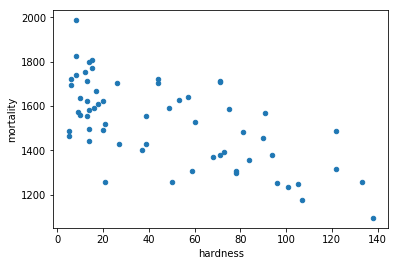

In [3]:
# Построим точесную взаимосвязь между жесткостью воды и средней годовой смертностью
df_water.plot(kind='scatter', x='hardness', y='mortality')

Из графика видим, что между жесткостью воды и средней годовой смертностью существует обратная взаимосвязь

In [4]:
# Рассчитаем коэффициенты корреляции Пирсона
df_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# Рассчитаем коэффициенты корреляции Спирмена
df_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
X = df_water[['hardness']]
y = df_water['mortality']

In [7]:
# Разделим данные на выборку для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
# Построим регрессионную модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [10]:
# Рассичаем коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

Коэффициент детерминации больше 1, следовательно, модель адекватна.

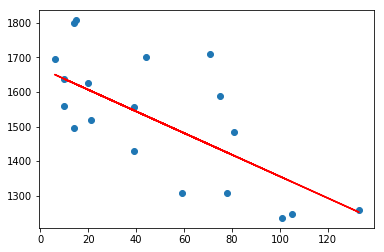

In [11]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

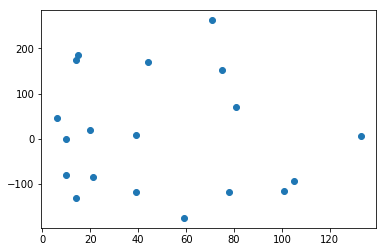

In [12]:
# Выведим график остатков
plt.scatter(X_test, (y_test - y_pred))

Точки на графике остатков распределены хаотично, следовательно, модель по данному признаку адекватна.

## 2 Задача - сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [13]:
# Разделим данные на две группы
df_water_north = df_water[(df_water.location == 'North')]
df_water_south = df_water[(df_water.location == 'South')]

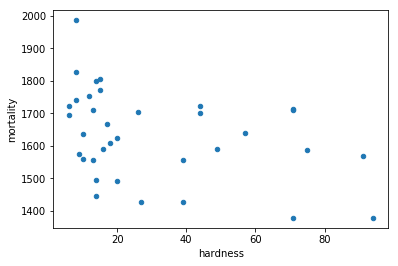

In [14]:
# Построим точесную взаимосвязь между жесткостью воды и средней годовой смертностью для северных городов
df_water_north.plot(kind='scatter', x='hardness', y='mortality')

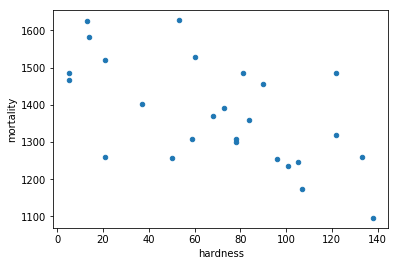

In [15]:
# Построим точесную взаимосвязь между жесткостью воды и средней годовой смертностью для южных городов
df_water_south.plot(kind='scatter', x='hardness', y='mortality')

In [16]:
# Рассчитаем коэффициент корреляции Пирсона для северных городов
df_water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [17]:
# Рассчитаем коэффициент корреляции Спирмена для северных городов
df_water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [18]:
# Рассчитаем коэффициент корреляции Пирсона для южных городов
df_water_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [19]:
# Рассчитаем коэффициент корреляции Спирмена для южных городов
df_water_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Из полученных значений видим, что обратная взаимосвязь между жесткостью воды и средней годовой смертностью для северных и южных городов по отдельности сохранилась. У южных городов эта связь более выражена, чем у северных городов.

In [20]:
# Построим предсказание для северных городов
X_n = df_water_north[['hardness']]
y_n = df_water_north['mortality']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train_n, y_train_n)
y_pred_n = model.predict(X_test_n)
y_pred_n

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [21]:
# Построим предсказание для южных городов
X_s = df_water_south[['hardness']]
y_s = df_water_south['mortality']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train_s, y_train_s)
y_pred_s = model.predict(X_test_s)
y_pred_s

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [22]:
# Рассичаем коэффициент детерминации для северных городов
model.score(X_test_s, y_test_s)

-2.5519223012352077

In [23]:
# Рассичаем коэффициент детерминации для южных городов
model.score(X_test_n, y_test_n)

-0.4868745949757425

Коэффициент детерминации для обоих случаев меньше нуля. Такие модели для построения предсказаний использовать нельзя. Возможно, это связано с тем, что выборка маленькая по своим размерам.

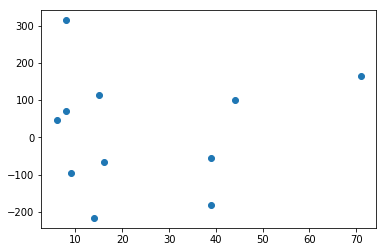

In [24]:
# Выведим график остатков для северных городов
plt.scatter(X_test_n, (y_test_n - y_pred_n))

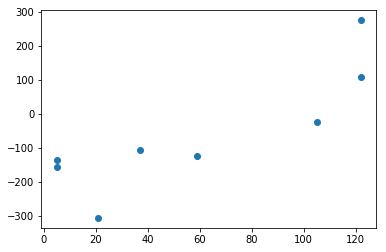

In [25]:
# Выведим график остатков для южных городов
plt.scatter(X_test_s, (y_test_s - y_pred_s))

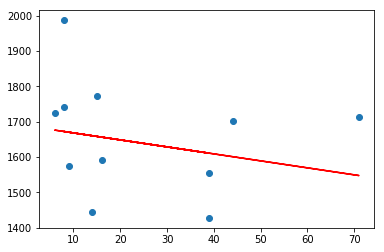

In [26]:
# Для северных городов
plt.scatter(X_test_n, y_test_n)
plt.plot(X_test_n, y_pred_n, c='r')

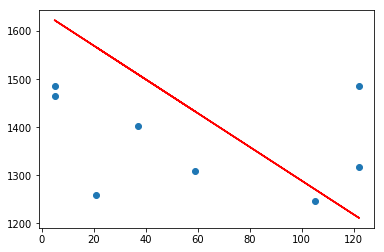

In [27]:
# Для южных городов
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred_s, c='r')